# TIME GENERALIZATION

#### Explanation of the Code

In the following code, we perform the following tasks:<br>

- Import necessary libraries.<br>
- Load the dataset using pandas.<br>
- Clean the data by removing missing values and unnecesary variables.<br>
- Conduct statistical analysis using pingouin library.<br>

You run each individual cell by Ctrl+Enter.<br>
Throughout the code, you will have to adjust names of variables to match your experiment.


In [2]:
# Install required libraries if not already installed
# run this the first time you run the code, then you can use the second cell instead
try:
    import pandas as pd
except ImportError:
    print("Pandas not found. Installing...")
    !pip install pandas
    import pandas as pd

try:
    import glob
except ImportError:
    print("Glob not found. Installing...")
    !pip install glob2
    import glob

try:
    import seaborn as sns
except ImportError:
    print("Seaborn not found. Installing...")
    !pip install seaborn
    import seaborn as sns

try:
    import pingouin as pg
except ImportError:
    print("Pingouin not found. Installing...")
    !pip install pingouin
    import pingouin as pg

try:
    import matplotlib.pyplot as plt
except ImportError:
    print("Matplotlib.pyplot not found. Installing...")
    !pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import numpy as np
except ImportError:
    print("Numpy not found. Installing...")
    !pip install numpy
    import numpy as np


Pingouin not found. Installing...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.0 MB/s eta 0:00:00


In [ ]:
#import required libraries

import pandas as pd
import glob
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
import numpy as np

## 1. CREATE DATA FRAME

#### Explanation of the Code
In this section:<br>
    - data will be loaded into one dataframe<br>
    - unnecessary lines and columns will be removed<br>
    - data will be reformated to match the needs of our statistical analysis


### collect logs into one file

In [5]:
from google.colab import files
import pandas as pd

# Upload files manually
uploaded = files.upload()

# Create DataFrame (for .csv or .xlsx)
import io
import os

dataframes = []
for filename in uploaded.keys():
    if filename.endswith(".csv"):
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
    elif filename.endswith(".xlsx"):
        df = pd.read_excel(io.BytesIO(uploaded[filename]))
    dataframes.append(df)

# Combine all DataFrames
combined_df = pd.concat(dataframes, ignore_index=True)


Saving 003105_time_gen00_A01_2024-10-17_20h59.26.821.csv to 003105_time_gen00_A01_2024-10-17_20h59.26.821.csv
Saving 028980_time_generalization_00_2024-10-07_19h35.15.027.csv to 028980_time_generalization_00_2024-10-07_19h35.15.027.csv
Saving 053758_time_generalization_00_2024-10-13_18h42.42.986.csv to 053758_time_generalization_00_2024-10-13_18h42.42.986.csv
Saving 089680_time_gen00_A01_2024-10-16_13h37.12.186.csv to 089680_time_gen00_A01_2024-10-16_13h37.12.186.csv
Saving 094062_time_generalization_00_2024-10-04_14h34.17.750.xlsx to 094062_time_generalization_00_2024-10-04_14h34.17.750.xlsx
Saving 094204_time_gen00_A01_2024-10-16_16h15.55.874.csv to 094204_time_gen00_A01_2024-10-16_16h15.55.874.csv
Saving 113546_time_generalization_00_2024-10-13_14h15.48.566.csv to 113546_time_generalization_00_2024-10-13_14h15.48.566.csv
Saving 165627_time_generalization_00_2024-10-09_18h04.49.168.xlsx to 165627_time_generalization_00_2024-10-09_18h04.49.168.xlsx
Saving 182377_time_generalization_00

In [6]:
# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)  # Set to None to display all rows
pd.set_option('display.max_columns', None)  # Set to None to display all columns

# function .describe() generates descriptive statistics for each column
combined_df.describe()

stress   accuracy    participant  session          age    frameRate  \
count  10.000000  10.000000    1468.000000   1468.0  1176.000000  1176.000000   
mean    0.300000   0.700000  101674.250681      1.0    22.127551    66.694673   
std     0.483046   0.483046   60406.951014      0.0     1.906510    31.380543   
min     0.000000   0.000000    3105.000000      1.0    21.000000    29.411765   
25%     0.000000   0.250000   53758.000000      1.0    21.000000    59.725775   
50%     0.000000   1.000000   94133.000000      1.0    21.000000    59.880240   
75%     0.750000   1.000000  165627.000000      1.0    22.000000    59.952038   
max     1.000000   1.000000  191786.000000      1.0    27.000000   145.658149   

       keyWelcome.rt  key_respExperimentDescription.rt  \
count      10.000000                         10.000000   
mean       51.065237                          7.011323   
std       140.459326                          7.363999   
min         0.208300                          0.124000   
25%         3.162412                          1.571338   
50%         4.470129                          5.871600   
75%        11.647875                          9.141992   
max       450.348066                         24.660205   

       key_respExperimentDescription_3.rt  key_respBorN.corr  key_respBorN.rt  \
count                           10.000000        1300.000000      1300.000000   
mean                            11.170458           0.738462         2.116771   
std                              7.852617           0.439642         5.056605   
min                              1.251011           0.000000        -6.815403   
25%                              6.331820           0.000000         1.456822   
50%                             10.674000           1.000000         1.727881   
75%                             13.605819           1.000000         2.036317   
max                             25.417812           1.000000       153.627700   

       training.thisRepN  training.thisTrialN  training.thisN  \
count              100.0           100.000000      100.000000   
mean                 0.0             4.500000        4.500000   
std                  0.0             2.886751        2.886751   
min                  0.0             0.000000        0.000000   
25%                  0.0             2.000000        2.000000   
50%                  0.0             4.500000        4.500000   
75%                  0.0             7.000000        7.000000   
max                  0.0             9.000000        9.000000   

       training.thisIndex  training.ran     duration     feedback  \
count          100.000000          40.0  1300.000000  1300.000000   
mean             4.500000           1.0     1.000000     0.538462   
std              2.886751           0.0     0.334793     0.498710   
min              0.000000           1.0     0.400000     0.000000   
25%              2.000000           1.0     0.800000     0.000000   
50%              4.500000           1.0     1.000000     1.000000   
75%              7.000000           1.0     1.200000     1.000000   
max              9.000000           1.0     1.600000     1.000000   

        noFeedback  key_respExperimentDescription_2.rt  \
count  1300.000000                           10.000000   
mean      0.538462                           16.516834   
std       0.498710                           12.191072   
min       0.000000                            0.883848   
25%       0.000000                           10.628741   
50%       1.000000                           12.284552   
75%       1.000000                           26.131598   
max       1.000000                           38.562318   

       key_respSeriesBlocks.rt  key_respBlockStart.rt  key_resp.rt  \
count                20.000000             120.000000    84.000000   
mean                 59.683159              28.258535     3.265986   
std                 209.166624              66.101133    15.818262   
min             

In [7]:
### YOU MAY SKIP THIS STEP IF YOU DO NOT USE RANDOMIZER TO ASSIGN SUBJETS TO GROUPS

# Fill missing 'stress' and 'accuracy' values within each participant group
# (replace 'stress' and 'accuracy' by the names of your between factors assigned via randomizer in psychopy, if relevant)

combined_df['stress'] = combined_df.groupby('participant')['stress'].transform('first')
combined_df['accuracy'] = combined_df.groupby('participant')['accuracy'].transform('first')


In [8]:
# save as csv (to back up or manually open in excel if needed)

combined_df.to_csv("combined_df24.csv")

# Download the file
files.download("combined_df24.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
#automatically remove redundant columns

# check and edit List of column names to select ('selected columns' right bellow), so all data you need or want gets to the final data frame)
# We want to include all your independent variables (in case of this list it is the feedback/noFeedback and stress/accuracy)
# We want to keep the record of durations and correct responses
# trial or block numbers are recorded here as Blocks.thisTrialN and BlockThisTrialN, this will have different names too
# i would keep the response times for te trials (key_respBorN.keys)
# make sure you keep the participant data too (all the variables you ask your subject to fill in in the start of exp.)

### you might perform this step in excel as well, on the comnined_df.csv you created in previous step

selected_columns = [
    'duration', 'corrAns', 'feedback', 'noFeedback',
    'Blocks.thisTrialN', 'Block.thisTrialN',
    'stress', 'accuracy', 'polygonBlackSquare.started',
    'polygonBlackSquare.stopped', 'key_respBorN.keys',
    'key_respBorN.corr', 'key_respBorN.rt', 'participant',
    'session', 'gender', 'age', 'date', 'expName', 'frameRate'
]

# Creating a new DataFrame with selected columns
new_df = combined_df[selected_columns]

# Removing rows where 'duration' is not recorded (contains NaN) - to get rid of lines that were not part of the experiment
new_df = new_df.dropna(subset=['duration'])

# Display the new DataFrame
print(new_df)


      duration corrAns  feedback  noFeedback  Blocks.thisTrialN  \
4          1.0       b       1.0         1.0                NaN   
5          0.4       n       1.0         1.0                NaN   
6          0.8       n       1.0         1.0                NaN   
7          1.2       n       1.0         1.0                NaN   
8          1.0       b       1.0         1.0                NaN   
9          0.6       n       1.0         1.0                NaN   
10         1.0       b       1.0         1.0                NaN   
11         1.0       b       1.0         1.0                NaN   
12         1.6       n       1.0         1.0                NaN   
13         1.4       n       1.0         1.0                NaN   
15         1.4       n       0.0         1.0                NaN   
16         1.0       b       0.0         1.0                NaN   
17         1.2       n       0.0         1.0                NaN   
18         0.4       n       0.0         1.0                Na

In [10]:
#see the descriptive statistics

"""
you might notice, that there is different count of lines for certain variables,
that is because the current data frame still contains training data from the first 10 trials, which we will not use
in analysis.
"""

new_df.describe()

duration     feedback   noFeedback  Blocks.thisTrialN  \
count  1300.000000  1300.000000  1300.000000         720.000000   
mean      1.000000     0.538462     0.538462           2.500000   
std       0.334793     0.498710     0.498710           1.709012   
min       0.400000     0.000000     0.000000           0.000000   
25%       0.800000     0.000000     0.000000           1.000000   
50%       1.000000     1.000000     1.000000           2.500000   
75%       1.200000     1.000000     1.000000           4.000000   
max       1.600000     1.000000     1.000000           5.000000   

       Block.thisTrialN       stress     accuracy  polygonBlackSquare.started  \
count       1200.000000  1300.000000  1300.000000                  780.000000   
mean           4.500000     0.300000     0.700000                  945.172965   
std            2.873479     0.458434     0.458434                  548.104237   
min            0.000000     0.000000     0.000000                   40.477526   
25%            2.000000     0.000000     0.000000                  517.157083   
50%            4.500000     0.000000     1.000000                  909.189956   
75%            7.000000     1.000000     1.000000                 1241.964606   
max            9.000000     1.000000     1.000000                 2265.776836   

       polygonBlackSquare.stopped  key_respBorN.corr  key_respBorN.rt  \
count                  758.000000        1300.000000      1300.000000   
mean                   938.123635           0.738462         2.116771   
std                    543.883611           0.439642         5.056605   
min                     41.470338           0.000000        -6.815403   
25%                    512.116400           0.000000         1.456822   
50%                    896.160819           1.000000         1.727881   
75%                   1237.199589           1.000000         2.036317   
max                   2252.765863           1.000000       153.627700   

         participant  session         age    frameRate  
count    1300.000000   1300.0  1040.00000  1040.000000  
mean   101712.500000      1.0    22.12500    66.793397  
std     60370.444564      0.0     1.90075    31.447802  
min      3105.000000      1.0    21.00000    29.411765  
25%     53758.000000      1.0    21.00000    59.725775  
50%     94133.000000      1.0    21.50000    59.880240  
75%    165627.000000      1.0    22.00000    60.024233  
max    191786.000000      1.0    27.00000   145.658149

In [12]:
'''
the count of measurements for each participant has to be the same and equal to the number of all trials in your experiment.
in mine, there were 10 training trials plus 120 trials.
now we check, if all participants submitted complete experiments
'''
# Display unique value counts for the 'participant' column in new_df
participant_counts = new_df['participant'].value_counts()

# Show the counts
print(participant_counts)


participant
3105.0      130
28980.0     130
53758.0     130
89680.0     130
94062.0     130
94204.0     130
113546.0    130
165627.0    130
182377.0    130
191786.0    130
Name: count, dtype: int64


In [14]:
# Get the participant IDs that have exactly 130 occurrences (10 training trials and 120 trials)
participants_to_keep = new_df['participant'].value_counts()
participants_to_keep = participants_to_keep[participants_to_keep == 130].index

# Filter new_df to keep only rows with these participants
filtered_df = new_df[new_df['participant'].isin(participants_to_keep)]

# Display the resulting DataFrame
print(filtered_df)


      duration corrAns  feedback  noFeedback  Blocks.thisTrialN  \
4          1.0       b       1.0         1.0                NaN   
5          0.4       n       1.0         1.0                NaN   
6          0.8       n       1.0         1.0                NaN   
7          1.2       n       1.0         1.0                NaN   
8          1.0       b       1.0         1.0                NaN   
9          0.6       n       1.0         1.0                NaN   
10         1.0       b       1.0         1.0                NaN   
11         1.0       b       1.0         1.0                NaN   
12         1.6       n       1.0         1.0                NaN   
13         1.4       n       1.0         1.0                NaN   
15         1.4       n       0.0         1.0                NaN   
16         1.0       b       0.0         1.0                NaN   
17         1.2       n       0.0         1.0                NaN   
18         0.4       n       0.0         1.0                Na

In [15]:
# now remove the training data
"""
you may probably have to replace 'Block.thisTrialN' with 'Trials.thisTrialN' or whatever name
has your variable indicating the number of trial or block of trials,
as those would have missing values during the training phase,
so the lines containing data from training will be removed
"""

new_df01 = filtered_df.dropna(subset=['Block.thisTrialN'])
display(new_df01.describe())

# .head() displays first couple of lines of a data frame
display(new_df01.head())

# now the count should be equal for all variables
# (in my case there are some missing data in thisRow.t, a variable indicating cumulative time at each trial, some logs just lack this measure)

duration     feedback   noFeedback  Blocks.thisTrialN  \
count  1200.000000  1200.000000  1200.000000         720.000000   
mean      1.000000     0.500000     0.500000           2.500000   
std       0.334804     0.500208     0.500208           1.709012   
min       0.400000     0.000000     0.000000           0.000000   
25%       0.800000     0.000000     0.000000           1.000000   
50%       1.000000     0.500000     0.500000           2.500000   
75%       1.200000     1.000000     1.000000           4.000000   
max       1.600000     1.000000     1.000000           5.000000   

       Block.thisTrialN       stress     accuracy  polygonBlackSquare.started  \
count       1200.000000  1200.000000  1200.000000                  720.000000   
mean           4.500000     0.300000     0.700000                 1007.945848   
std            2.873479     0.458449     0.458449                  521.492482   
min            0.000000     0.000000     0.000000                  149.910112   
25%            2.000000     0.000000     0.000000                  612.474735   
50%            4.500000     0.000000     1.000000                  968.991437   
75%            7.000000     1.000000     1.000000                 1281.948163   
max            9.000000     1.000000     1.000000                 2265.776836   

       polygonBlackSquare.stopped  key_respBorN.corr  key_respBorN.rt  \
count                  699.000000        1200.000000      1200.000000   
mean                  1000.862010           0.743333         2.099522   
std                    517.577597           0.436976         5.235686   
min                    150.910333           0.000000        -5.405715   
25%                    608.210232           0.000000         1.437312   
50%                    961.569875           1.000000         1.708425   
75%                   1279.072294           1.000000         2.017775   
max                   2252.765863           1.000000       153.627700   

         participant  session         age   frameRate  
count    1200.000000   1200.0  960.000000  960.000000  
mean   101712.500000      1.0   22.125000   66.793397  
std     60372.381097      0.0    1.900826   31.449064  
min      3105.000000      1.0   21.000000   29.411765  
25%     53758.000000      1.0   21.000000   59.725775  
50%     94133.000000      1.0   21.500000   59.880240  
75%    165627.000000      1.0   22.000000   60.024233  
max    191786.000000      1.0   27.000000  145.658149

duration corrAns  feedback  noFeedback  Blocks.thisTrialN  \
15       1.4       n       0.0         1.0                NaN   
16       1.0       b       0.0         1.0                NaN   
17       1.2       n       0.0         1.0                NaN   
18       0.4       n       0.0         1.0                NaN   
19       1.0       b       0.0         1.0                NaN   

    Block.thisTrialN  stress  accuracy  polygonBlackSquare.started  \
15               0.0     0.0       1.0                         NaN   
16               1.0     0.0       1.0                         NaN   
17               2.0     0.0       1.0                         NaN   
18               3.0     0.0       1.0                         NaN   
19               4.0     0.0       1.0                         NaN   

    polygonBlackSquare.stopped key_respBorN.keys  key_respBorN.corr  \
15                         NaN                 b                0.0   
16                         NaN                 b                1.0   
17                         NaN                 n                1.0   
18                         NaN                 n                1.0   
19                         NaN                 n                0.0   

    key_respBorN.rt  participant  session gender   age  \
15           2.3671       3105.0      1.0      f  21.0   
16           1.6014       3105.0      1.0      f  21.0   
17           1.5806       3105.0      1.0      f  21.0   
18           1.4306       3105.0      1.0      f  21.0   
19           2.9019       3105.0      1.0      f  21.0   

                       date         expName  frameRate  
15  2024-10-17_20h59.26.821  time_gen00_A01   59.88024  
16  2024-10-17_20h59.26.821  time_gen00_A01   59.88024  
17  2024-10-17_20h59.26.821  time_gen00_A01   59.88024  
18  2024-10-17_20h59.26.821  time_gen00_A01   59.88024  
19  2024-10-17_20h59.26.821  time_gen00_A01   59.88024

In [ ]:
#save the final data frame to backup and/or inspect in excel
new_df.to_csv('new_df24.csv')

# Download the file
files.download("new_df24.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2. STATISTICAL ANALYSIS

#### Explanation of the Code

In the following section, we perform the following tasks:<br>

- calculate response ratios.<br>
- Load the dataset using pandas.<br>
- Clean the data by removing missing values and unnecesary variables.<br>
- Conduct statistical analysis using pingouin library.<br>

You run each individual cell by Ctrl+Enter.<br>
Throughout the code, you will have to adjust names of variables to match your experiment.


### new df for anova

In [16]:
#create new data frame with response ratios using the dataframe called new_df01 with your data
#new variable Response ratio will be created with values 0 to 1, representing the ration of same vs different judgments about the length of the stimuli as compared to standard

""""
Create a pivot table to calculate the counts of 'b' and 'n' for each group

we need to make the counts for each participant at each duration at each condition,
so edit the code to contain your independent variables
my independent variables were 'feedback' and 'stress'
keep the variables 'duration' and 'participant' in the list
"""

pivot_table = new_df01.pivot_table(index=['duration', 'feedback', 'participant','stress'], columns='key_respBorN.keys',
                                   aggfunc='size', fill_value=0)

# Calculate the Response Ratio (count of 'b' / count of 'n') for each group
pivot_table['Response_Ratio'] = pivot_table['b'] / (pivot_table['b'] + pivot_table['n'])

# Reset the index to have a new dataframe with the specified columns
result_df = pivot_table.reset_index()

# If you want to replace any NaN values with 0, you can use fillna method
result_df.fillna(0, inplace=True)

# If you want to save this new dataframe to a CSV file, you can use:
#result_df.to_csv("response_ratios.csv", index=False)


In [ ]:
result_df

key_respBorN.keys  duration  feedback      participant  stress   b   n  \
0                       0.4       0.0             3105     0.0   1   5   
1                       0.4       0.0          28980.0     1.0   0   6   
2                       0.4       0.0          53758.0     0.0   0   6   
3                       0.4       0.0            89680     0.0   0   6   
4                       0.4       0.0          94062.0     0.0   0   6   
5                       0.4       0.0            94204     0.0   1   5   
6                       0.4       0.0         113546.0     1.0   0   6   
7                       0.4       0.0         165627.0     0.0   0   6   
8                       0.4       0.0         182377.0     1.0   0  12   
9                       0.4       0.0           191786     0.0   0   6   
10                      0.4       0.0           220818     1.0   0   6   
11                      0.4       0.0           224929     0.0   1   5   
12                      0.4       0.0         251228.0     1.0   0   6   
13                      0.4       0.0           279081     0.0   0   6   
14                      0.4       0.0         295127.0     1.0   0   6   
15                      0.4       0.0         295379.0     1.0   4   2   
16                      0.4       0.0           312424     0.0   0   6   
17                      0.4       0.0         331244.0     0.0   2   4   
18                      0.4       0.0           336165     0.0   0   6   
19                      0.4       0.0         364982.0     1.0   1   5   
20                      0.4       0.0           372152     1.0   0   6   
21                      0.4       0.0         379438.0     0.0   1   5   
22                      0.4       0.0           387757     1.0   0   6   
23                      0.4       0.0         392549.0     0.0   0   6   
24                      0.4       0.0         395970.0     0.0   0   6   
25                      0.4       0.0         468938.0     0.0   0   6   
26                      0.4       0.0           484214     0.0   3   3   
27                      0.4       0.0           508816     0.0   0   6   
28                      0.4       0.0           528876     1.0   0   6   
29                      0.4       0.0         542053.0     0.0   1   5   
30                      0.4       0.0         547889.0     0.0   0   6   
31                      0.4       0.0           609930     0.0   2   4   
32                      0.4       0.0         663018.0     0.0   0   6   
33                      0.4       0.0           687194     0.0   3   3   
34                      0.4       0.0           706888     0.0   0   6   
35                      0.4       0.0         712386.0     1.0   2   4   
36                      0.4       0.0         753211.0     1.0   2  10   
37                      0.4       0.0           756759     1.0   0   6   
38                      0.4       0.0         757560.0     0.0   0   6   
39                      0.4       0.0         762464.0     0.0   0   6   
40                      0.4       0.0         798994.0     0.0   0   6   
41                      0.4       0.0         815636.0     0.0   0   6   
42                      0.4       0.0         845695.0     0.0   0   6   
43                      0.4       0.0           847531     1.0   0   6   
44                      0.4       0.0           857023     1.0   0   6   
45                      0.4       0.0           872510     0.0   0   6   
46                      0.4       0.0         873613.0     0.0   0   6   
47                      0.4       0.0           895840     0.0   0   6   
48                      0.4       0.0         927609.0     1.0   1   5   
49                      0.4       0.0           929321     1.0   0   6   
50                      0.4       0.0         949904.0     0.0   0   6   
51                      0.4       0.0  Jolana Kodetová     0.0   4   2   
52                      0.4       1.0             3105     0.0   2   4   
53  

In [ ]:
'''
before you proceed to statistics section, make sure that each participant has the same number of measurements,
overally, have a look on expected number of rows and real number of rows, if they match, proceed,
otherwise, identify participants with not all measurements recorded and remove them from the data set
'''

In [17]:
import pandas as pd

# Group the data by 'participant' and 'duration' and count the Response_Ratio occurrences
count_df = result_df.groupby(['participant', 'duration']).size().reset_index(name='count')

# Identify participants who do not have exactly 2 measurements per duration
invalid_participants = count_df[count_df['count'] != 2]['participant'].unique()

# Print the list of participants who do not meet the condition
if len(invalid_participants) > 0:
    print("Participants with unequal measurements (not 2 for each duration):")
    for participant in invalid_participants:
        print(participant)
else:
    print("All participants have exactly 2 measurements for each duration.")


All participants have exactly 2 measurements for each duration.


In [20]:
#next 3 cells serve for potential debugging, may skip

In [ ]:
# Number of unique participants
unique_participants = result_df['participant'].nunique()

# Number of unique durations
unique_durations = result_df['duration'].nunique()

# Number of unique feedback values
unique_feedback = result_df['feedback'].nunique()

# Print the results
print(f"Number of unique participants: {unique_participants}")
print(f"Number of unique durations: {unique_durations}")
print(f"Number of unique feedback values: {unique_feedback}")



Number of unique participants: 50
Number of unique durations: 7
Number of unique feedback values: 2


In [ ]:
expected_rows = unique_participants * unique_durations * unique_feedback

700

In [ ]:
# Get the number of rows in result_df
num_rows = result_df.shape[0]
print(f"Number of rows in result_df: {num_rows}")


Number of rows in result_df: 700


### plot the temporal generalization gradients

<Axes: xlabel='duration', ylabel='Response_Ratio'>

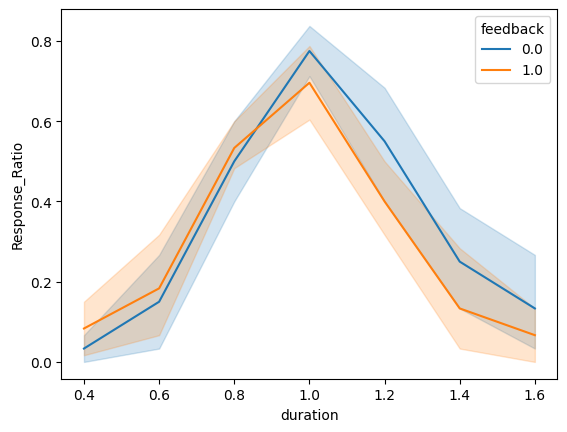

In [21]:
# here I use my within factor 'feedback' as hue to observe the distinct gradients in one plot

sns.lineplot(data=result_df, x="duration", y="Response_Ratio", hue="feedback")

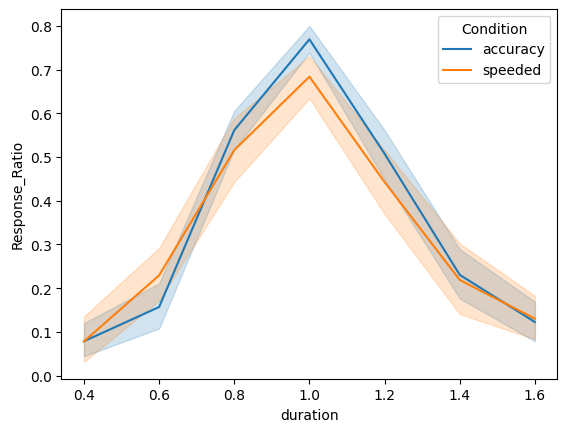

In [ ]:
# Plot using 'stress' as the hue
sns.lineplot(data=result_df, x="duration", y="Response_Ratio", hue="stress")

# Customizing the legend labels
new_legend_labels = ['accuracy', 'speeded']  # Replace with your desired labels

# Fetch handles and labels, then set new custom labels
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=new_legend_labels, title='Condition')

# Show the plot
plt.show()


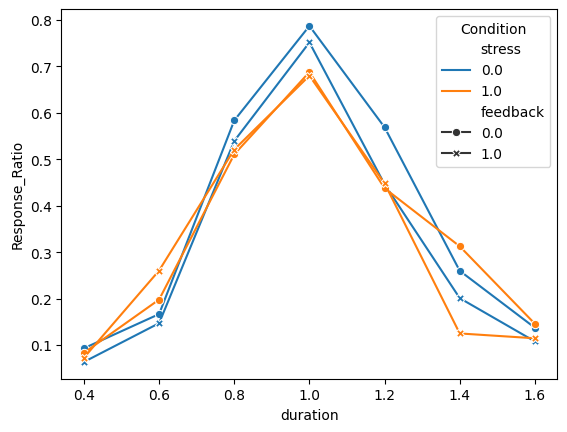

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot lines without shaded variance (ci deprecated, use errorbar=None)
sns.lineplot(
    data=result_df,
    x="duration",
    y="Response_Ratio",
    hue="stress",
    style="feedback",
    markers=True,
    dashes=False,
    errorbar=None  # Replaces ci=None
)

# Customizing the legend labels for clarity
# Use actual legend labels as keys instead of tuples
legend_labels = {
    '0': 'No Stress',
    '1': 'Stress',
    '0_feedback': 'No Feedback',
    '1_feedback': 'Feedback'
}

# Update legend with custom labels
handles, labels = plt.gca().get_legend_handles_labels()

# Loop to map labels to the legend_labels dictionary
new_labels = []
for label in labels:
    if 'stress' in label.lower():  # Example of identifying 'stress'
        new_labels.append(legend_labels.get(label, label))
    elif 'feedback' in label.lower():
        new_labels.append(legend_labels.get(f"{label}_feedback", label))
    else:
        new_labels.append(label)

plt.legend(handles=handles, labels=new_labels, title='Condition')

# Display the plot
plt.show()


### perform repeated measures anova on your within factor and duration

In [ ]:
#perform anova
pg.rm_anova(data=result_df, within=['duration', 'feedback'], dv='Response_Ratio', subject='participant')

/usr/local/lib/python3.10/dist-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/usr/local/lib/python3.10/dist-packages/pingouin/distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)


Source         SS  ddof1  ddof2        MS           F  \
0             duration  37.869365      6    294  6.311561  135.951389   
1             feedback   0.280000      1     49  0.280000   13.253117   
2  duration * feedback   0.202778      6    294  0.033796    1.445023   

          p-unc     p-GG-corr       ng2       eps  
0  9.517926e-82  3.222409e-48  0.588453  0.575967  
1  6.548062e-04  6.548062e-04  0.010462  1.000000  
2  1.971909e-01  2.193782e-01  0.007598  0.683963

In [ ]:
""""
to be able to perform this test, we need to have same number of elements in all conditions,
In my case, I found one participant that was causing error, as he/she completed only halve of the experiment
I found it using the code in the cell bellow, hope you might not need it
"""
# Convert 'participant' to string to ensure consistency
result_df['participant'] = result_df['participant'].astype('category')

# Re-check the column types
print(result_df.dtypes)

# Perform the sanity check again
#print(result_df.groupby(['participant', 'duration', 'feedback']).size())

result_df['duration'] = result_df['duration'].astype('category')
result_df['feedback'] = result_df['feedback'].astype('category')
# Convert 'Response_Ratio' to numeric, coerce invalid values to NaN
result_df['Response_Ratio'] = pd.to_numeric(result_df['Response_Ratio'], errors='coerce')

# Drop rows with NaN in 'Response_Ratio'
result_df = result_df.dropna(subset=['Response_Ratio'])

#perform pairwise t-tests


# run pairwise ttest
a = pg.pairwise_tests(data=result_df, within=['duration','feedback'], dv='Response_Ratio', subject='participant', effsize = 'cohen')

# you might want to see only significant results, and only those for interaction of feedback*duration
display(a[(a["p-unc"] < 0.05) & (a["Contrast"] == 'duration * feedback')])



key_respBorN.keys
duration          category
feedback          category
participant       category
stress             float64
b                    int64
n                    int64
Response_Ratio     float64
dtype: object


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:7762: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:7754: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


Contrast duration    A    B Paired Parametric         T   dof  \
27  duration * feedback      1.4  0.0  1.0   True       True  2.733967  49.0   

   alternative     p-unc   BF10     cohen  
27   two-sided  0.008684  4.243  0.426401

In [23]:
"""
as we are performing multiple comparisons, we should make sure we aplly p correction,
if not applied during testing, you can calculate the desired alpha after bonferroni correction manually
"""

def calculate_num_comparisons(levels_factor1, levels_factor2):
    return levels_factor1 * levels_factor2

def calculate_corrected_alpha(desired_fwer, num_comparisons):
    return desired_fwer / num_comparisons

# Example usage:
levels_factor1 = 2  # Number of levels in the first factor (feedback)
levels_factor2 = 7  # Number of levels in the second factor (duration)
desired_fwer = 0.05  # Desired family-wise error rate

num_comparisons = calculate_num_comparisons(levels_factor1, levels_factor2)
corrected_alpha = calculate_corrected_alpha(desired_fwer, num_comparisons)

print(f"Number of comparisons: {num_comparisons}")
print(f"Bonferroni-corrected alpha: {corrected_alpha}")

Number of comparisons: 14
Bonferroni-corrected alpha: 0.0035714285714285718


### perform ANOVA on your between factor

In [24]:
"""
as we measured the influence of our between factor various times in a participant (in distinct durations),
mixed anova (version of anova taking account of both within and between factors) should be performed
to figure out if there were significant differences in between the groups at specific durations
"""

pg.mixed_anova(data=result_df, dv='Response_Ratio', within='duration', subject='participant',
               between='stress', correction='auto', effsize='np2')


Source        SS  DF1  DF2        MS          F         p-unc  \
0       stress  0.010771    1    8  0.010771   0.420324  5.349369e-01   
1     duration  3.921218    6   48  0.653536  32.089435  3.377900e-15   
2  Interaction  0.179955    6   48  0.029993   1.472669  2.076595e-01   

      p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0           NaN  0.049918       NaN        NaN       NaN       NaN  
1  2.177101e-07  0.800446  0.396705      False  0.005754  0.031302  
2           NaN  0.155465       NaN        NaN       NaN       NaN

In [25]:
#perform pairwise t-tests
""""
to be able to perform this test, we need to have same number of elements in all conditions,
see the section above if having issues with the balance of the sample error...
"""

# run pairwise ttest
a = pg.pairwise_ttests(data=result_df, within='duration', dv='Response_Ratio', subject='participant', between = 'stress', effsize = 'cohen')
# you might want to see only significant results, and only those for interaction of feedback*duration
display(a[(a["p-unc"] < 0.05) & (a["Contrast"] == 'duration * stress')])



/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


Contrast duration    A    B Paired Parametric         T  \
24  duration * stress      0.8  0.0  1.0  False       True -2.794783   

         dof alternative     p-unc   BF10     cohen  
24  7.729005   two-sided  0.024192  2.908 -1.441273

In [ ]:
""""
as we are performing multiple comparisons, we should make sure we aplly p correction,
if not applied during testing, you can calculate the desired alpha after bonferroni correction manually
""""

def calculate_num_comparisons(levels_factor1, levels_factor2):
    return levels_factor1 * levels_factor2

def calculate_corrected_alpha(desired_fwer, num_comparisons):
    return desired_fwer / num_comparisons

# Example usage:
levels_factor1 = 2  # Number of levels in the first factor (stress)
levels_factor2 = 7  # Number of levels in the second factor (duration)
desired_fwer = 0.05  # Desired family-wise error rate

num_comparisons = calculate_num_comparisons(levels_factor1, levels_factor2)
corrected_alpha = calculate_corrected_alpha(desired_fwer, num_comparisons)

print(f"Number of comparisons: {num_comparisons}")
print(f"Bonferroni-corrected alpha: {corrected_alpha}")


Number of comparisons: 14
Bonferroni-corrected alpha: 0.0035714285714285718


In [ ]:
#now you can check if the results of posthoc testing stand significant against the bonferroni-corrected alpha

### calculate weighted mean gradient


In [26]:
# Assuming you have the 'result_df' dataframe from the previous step

"""
We are replicating a procedure from Klapproth and Wearden, 2011
Here is citation from the paper, describing the construction of the parameter:

In order to numerically examine the shift of the
gradients, we calculated the weighted mean of the
gradient of each participant.
This was done by
[1]multiplying the number of “same” responses with the
duration at which a “same” response was given,
[2] adding these products,
and then
[4] dividing this weighted sum by the number of “same” responses
of each participant given at all durations (calculated at step [3] in our case)
"""


# [1] Calculate the weighted sum for each participant and duration combination (result_df already contains number of same responses as variable 'b')

result_df['Weighted_Sum'] = result_df['b'] * result_df['duration']

# [2] Add the weighted sums to have a total for each combination of participant and values of your independent variables
""""
You will need to replace my independent variables by yours.
Keep the participant in the list, though.
"""
grouped = result_df.groupby(['participant', 'feedback','stress'])['Weighted_Sum'].sum().reset_index()

# [3] Calculate the total count of "b" responses for each participant and feedback combination
grouped['Total_b_Responses'] = result_df.groupby(['participant', 'feedback'])['b'].transform('sum')

# [4] Calculate the weighted mean of the gradient for each participant and feedback combination
grouped['Weighted_Mean_Gradient'] = grouped['Weighted_Sum'] / grouped['Total_b_Responses']

# If you want to save this new dataframe to a CSV file, you can use:
#grouped.to_csv("weighted_mean_gradient.csv", index=False)



### plot results and test your hypotheses

<Axes: xlabel='stress', ylabel='Weighted_Mean_Gradient'>

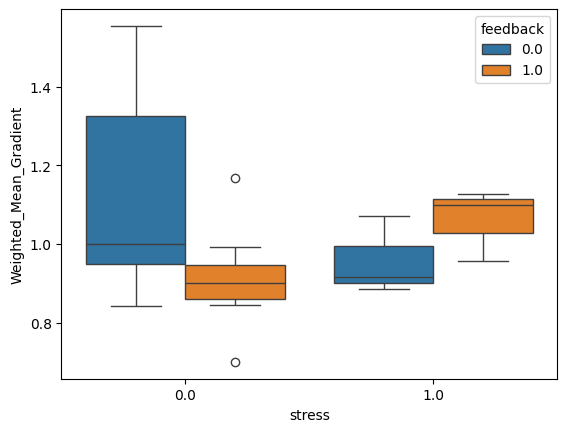

In [27]:
# create boxplot supporting your analysis
"""
As I had two variables, I display on x and the other as hue, if you have less variables, use just x
"""
sns.boxplot(data=grouped, x="stress", y="Weighted_Mean_Gradient", hue="feedback")

<AxesSubplot:xlabel='stress', ylabel='Weighted_Mean_Gradient'>

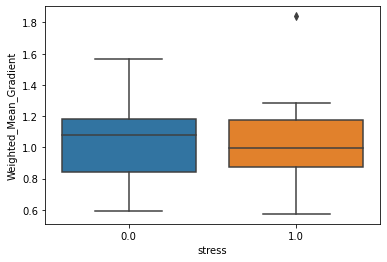

In [ ]:
sns.boxplot(data=grouped, x="stress", y="Weighted_Mean_Gradient")

<AxesSubplot:xlabel='feedback', ylabel='Weighted_Mean_Gradient'>

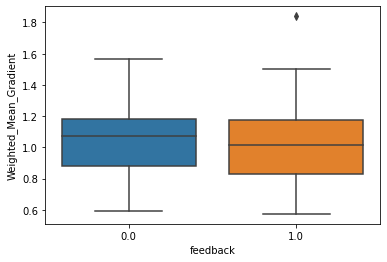

In [ ]:
sns.boxplot(data=grouped, x="feedback", y="Weighted_Mean_Gradient")

### ANOVA
In this section we will test our hypotheses using the Weighted_Mean_Gradient as our dependent variable.<br>
Choose a version of ANOVA, congruent with your design.
    

In [30]:
# use this for within subject designs
pg.rm_anova(data=grouped, dv="Weighted_Mean_Gradient", within=["feedback"], subject="participant")

Source  ddof1  ddof2         F     p-unc       ng2  eps
0  feedback      1      9  2.374634  0.157709  0.098612  1.0

In [ ]:
# use this for mixed designs
pg.mixed_anova(data=grouped, dv="Weighted_Mean_Gradient", within="feedback", between ='stress', subject="participant")

Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0       stress  0.014358    1   27  0.014358  0.160084  0.692227  0.005894   
1     feedback  0.000226    1   27  0.000226  0.003812  0.951226  0.000141   
2  Interaction  0.021490    1   27  0.021490  0.362350  0.552226  0.013243   

   eps  
0  NaN  
1  1.0  
2  NaN

In [ ]:
# use this for between subject designs
pg.anova(data=grouped, dv="Weighted_Mean_Gradient", between ='stress')

Source  ddof1  ddof2         F     p-unc       np2
0  stress      1     57  0.225555  0.636654  0.003942

In [ ]:
# generate mean values for each condition
"""
edit to calculate weighted mean gradients for each condition
this is the proxy of how long the second lasted for the given situation
"""

mean_A = grouped[(grouped["stress"]==0)&(grouped["feedback"]==0)]["Weighted_Mean_Gradient"].mean()
mean_B = grouped[(grouped["stress"]==0)&(grouped["feedback"]==1)]["Weighted_Mean_Gradient"].mean()
mean_C = grouped[(grouped["stress"]==1)&(grouped["feedback"]==0)]["Weighted_Mean_Gradient"].mean()
mean_D = grouped[(grouped["stress"]==1)&(grouped["feedback"]==1)]["Weighted_Mean_Gradient"].mean()

#mean_A
#mean_B
print([mean_A, mean_B, mean_C, mean_D])

[1.0321791542242609, 1.0716820718544977, 1.03491869257555, 1.0016745070050221]


### TTESTS

T        dof alternative     p-val          CI95%   cohen-d  \
T-test  0.182096  17.953943   two-sided  0.857548  [-0.15, 0.17]  0.066167   

         BF10     power  
T-test  0.426  0.051894

WMG under accuracy condition: 1.0233696373278274
WMG under speeded condition: 1.0094175148522975
mean difference: 0.013952122475529904


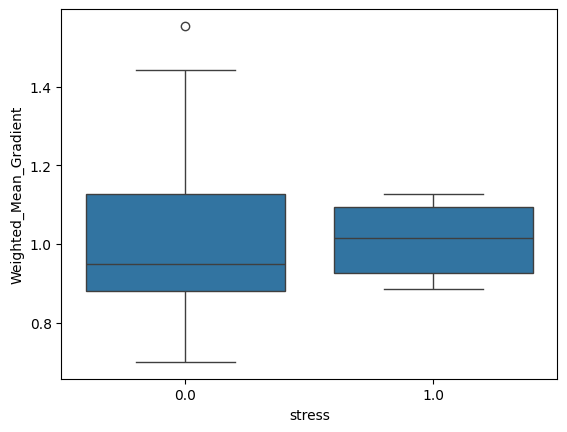

In [28]:
#ttest for between factor
x = grouped[(grouped["stress"]==0)]["Weighted_Mean_Gradient"]
y = grouped[(grouped["stress"]==1)]["Weighted_Mean_Gradient"]
display(pg.ttest(x,y, paired=False))
sns.boxplot(data=grouped, x="stress", y="Weighted_Mean_Gradient")
print("WMG under accuracy condition:", x.mean())
print("WMG under speeded condition:", y.mean())
mean_diff = x.mean() - y.mean()
print("mean difference:", mean_diff)



T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  1.540985    9   two-sided  0.157709  [-0.06, 0.31]  0.627568  0.766   

           power  
T-test  0.425952

WMG under no-feedback condition: 1.082034248859586
WMG under feedback condition: 0.9563337523107508
mean difference: 0.1257004965488352


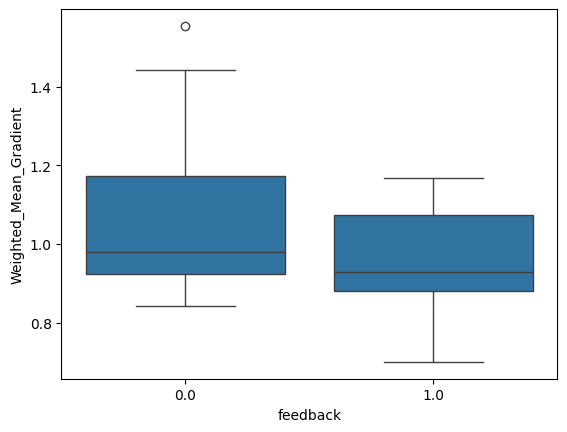

In [31]:
#ttest for within factor
x = grouped[(grouped["feedback"]==0)]["Weighted_Mean_Gradient"]
y = grouped[(grouped["feedback"]==1)]["Weighted_Mean_Gradient"]
display(pg.ttest(x,y, paired=True))
sns.boxplot(data=grouped, x="feedback", y="Weighted_Mean_Gradient")
print("WMG under no-feedback condition:", x.mean())
print("WMG under feedback condition:", y.mean())
mean_diff = x.mean() - y.mean()
print("mean difference:", mean_diff)

## 3. ANALYSIS TAKING ACCOUNT OF BLOCK NUMBER

### FOR BETWEEN FACTOR AND BLOCK

In [ ]:
#create new data frame with response ratios using the dataframe called new_df01 with your data you generated in the section 1

""""
Create a pivot table to calculate the counts of 'b' and 'n' for each group

we need to make the counts for each participant at each duration at each condition,
so edit the code to contain your independent variables
my independent variables were 'stress' and the number of the block.
keep the variables 'duration' and 'participant' in the list
"""

pivot_table = new_df01.pivot_table(index=['duration', 'participant','stress', 'Blocks.thisTrialN'], columns='key_respBorN.keys',
                                   aggfunc='size', fill_value=0)

# Calculate the Response Ratio (count of 'b' / count of 'n') for each group
pivot_table['Response_Ratio'] = pivot_table['b'] / (pivot_table['b'] + pivot_table['n'])

# Reset the index to have a new dataframe with the specified columns
result_df01 = pivot_table.reset_index()

# If you want to replace any NaN values with 0, you can use fillna method
result_df01.fillna(0, inplace=True)

# If you want to save this new dataframe to a CSV file, you can use:
#result_df01.to_csv("response_ratios.csv", index=False)


In [ ]:
#rename Blocks.thisTrialN to 'block'
result_df01.rename(columns={'Blocks.thisTrialN': 'block'}, inplace=True)


In [ ]:
result_df

key_respBorN.keys  duration  feedback  participant  stress  Blocks.thisTrialN  \
0                       0.4       0.0      27171.0     1.0                0.0   
1                       0.4       0.0      27171.0     1.0                1.0   
2                       0.4       0.0      27171.0     1.0                2.0   
3                       0.4       0.0      27171.0     1.0                3.0   
4                       0.4       0.0      27171.0     1.0                4.0   
5                       0.4       0.0      27171.0     1.0                5.0   
6                       0.4       0.0      80551.0     0.0                0.0   
7                       0.4       0.0      80551.0     0.0                1.0   
8                       0.4       0.0      80551.0     0.0                2.0   
9                       0.4       0.0      80551.0     0.0                3.0   
10                      0.4       0.0      80551.0     0.0                4.0   
11                      0.4       0.0      80551.0     0.0                5.0   
12                      0.4       0.0      96604.0     1.0                0.0   
13                      0.4       0.0      96604.0     1.0                1.0   
14                      0.4       0.0      96604.0     1.0                2.0   
15                      0.4       0.0      96604.0     1.0                3.0   
16                      0.4       0.0      96604.0     1.0                4.0   
17                      0.4       0.0      96604.0     1.0                5.0   
18                      0.4       0.0     124367.0     0.0                0.0   
19                      0.4       0.0     124367.0     0.0                1.0   
20                      0.4       0.0     124367.0     0.0                2.0   
21                      0.4       0.0     124367.0     0.0                3.0   
22                      0.4       0.0     124367.0     0.0                4.0   
23                      0.4       0.0     124367.0     0.0                5.0   
24                      0.4       0.0     135784.0     0.0                0.0   
25                      0.4       0.0     135784.0     0.0                1.0   
26                      0.4       0.0     135784.0     0.0                2.0   
27                      0.4       0.0     135784.0     0.0                3.0   
28                      0.4       0.0     135784.0     0.0                4.0   
29                      0.4       0.0     135784.0     0.0                5.0   
30                      0.4       0.0     144507.0     0.0                0.0   
31                      0.4       0.0     144507.0     0.0                1.0   
32                      0.4       0.0     144507.0     0.0                2.0   
33                      0.4       0.0     144507.0     0.0                3.0   
34                      0.4       0.0     144507.0     0.0                4.0   
35                      0.4       0.0     144507.0     0.0                5.0   
36                      0.4       0.0     195972.0     0.0                0.0   
37                      0.4       0.0     195972.0     0.0                1.0   
38                      0.4       0.0     195972.0     0.0                2.0   
39                      0.4       0.0     195972.0     0.0                3.0   
40                      0.4       0.0     195972.0     0.0                4.0   
41                      0.4       0.0     195972.0     0.0                5.0   
42                      0.4       0.0     201266.0     1.0                0.0   
43                      0.4       0.0     201266.0     1.0                1.0   
44                      0.4       0.0     201266.0     1.0                2.0   
45                      0.4       0.0     201266.0     1.0                3.0   
46                      0.4       0.0     201266.0     1.0                4.0   
47                      0.4       0.0     201266.0     1.0                5.0   
48                      0.4    

In [ ]:
# Assuming you have the 'result_df01' dataframe from the previous step

"""
We are replicating a procedure from Klapproth and Wearden, 2011
Here is citation from the paper, describing the construction of the parameter:

In order to numerically examine the shift of the
gradients, we calculated the weighted mean of the
gradient of each participant.
This was done by
[1]multiplying the number of “same” responses with the
duration at which a “same” response was given,
[2] adding these products,
and then
[4] dividing this weighted sum by the number of “same” responses
of each participant given at all durations (calculated at step [3] in our case)
"""


# [1] Calculate the weighted sum for each participant and duration combination (result_df01 already contains number of same responses as variable 'b')

result_df01['Weighted_Sum'] = result_df01['b'] * result_df01['duration']

# [2] Add the weighted sums to have a total for each combination of participant and values of your independent variables
""""
You will need to replace my independent variables by yours.
Keep the participant in the list, though.
"""
grouped01 = result_df01.groupby(['participant','stress','block'])['Weighted_Sum'].sum().reset_index()

# [3] Calculate the total count of "b" responses for each participant and feedback combination
grouped01['Total_b_Responses'] = result_df01.groupby(['participant', 'block'])['b'].transform('sum')

# [4] Calculate the weighted mean of the gradient for each participant and feedback combination
grouped01['Weighted_Mean_Gradient'] = grouped01['Weighted_Sum'] / grouped01['Total_b_Responses']

# If you want to save this new dataframe to a CSV file, you can use:
#grouped01.to_csv("weighted_mean_gradient.csv", index=False)



In [ ]:
#this data frame contains WMR calculated separately for each block under distinct conditions
#in the first itteration (grouped), there are two WMG values per participant, now there are 6
grouped01

participant  stress  block  Weighted_Sum  Total_b_Responses  \
0        27171.0     1.0    0.0           9.6                 11   
1        27171.0     1.0    1.0           6.2                  6   
2        27171.0     1.0    2.0           9.0                  8   
3        27171.0     1.0    3.0           8.8                  9   
4        27171.0     1.0    4.0           8.4                  8   
5        27171.0     1.0    5.0           8.0                  7   
6        80551.0     0.0    0.0           3.6                  3   
7        80551.0     0.0    1.0          10.2                 11   
8        80551.0     0.0    2.0           6.0                  7   
9        80551.0     0.0    3.0           4.2                  3   
10       80551.0     0.0    4.0           3.2                  4   
11       80551.0     0.0    5.0          12.6                 13   
12       96604.0     1.0    0.0           6.8                  7   
13       96604.0     1.0    1.0           4.8                  5   
14       96604.0     1.0    2.0           8.4                  8   
15       96604.0     1.0    3.0          10.0                 10   
16       96604.0     1.0    4.0           9.6                  9   
17       96604.0     1.0    5.0          11.2                 11   
18      124367.0     0.0    0.0           6.2                  7   
19      124367.0     0.0    1.0           4.8                  6   
20      124367.0     0.0    2.0          11.4                 11   
21      124367.0     0.0    3.0           9.2                  9   
22      124367.0     0.0    4.0           8.2                  8   
23      124367.0     0.0    5.0           7.6                  7   
24      135784.0     0.0    0.0           5.2                  5   
25      135784.0     0.0    1.0           8.0                  8   
26      135784.0     0.0    2.0          11.0                 12   
27      135784.0     0.0    3.0          14.2                 14   
28      135784.0     0.0    4.0          10.0                 12   
29      135784.0     0.0    5.0          11.4                 11   
30      144507.0     0.0    0.0           5.4                  5   
31      144507.0     0.0    1.0           9.8                 10   
32      144507.0     0.0    2.0          10.0                 10   
33      144507.0     0.0    3.0           8.2                  9   
34      144507.0     0.0    4.0           9.0                  9   
35      144507.0     0.0    5.0           9.8                 10   
36      195972.0     0.0    0.0           8.8                  9   
37      195972.0     0.0    1.0           9.2                 10   
38      195972.0     0.0    2.0           9.4                  9   
39      195972.0     0.0    3.0           6.6                  7   
40      195972.0     0.0    4.0           5.8                  6   
41      195972.0     0.0    5.0           9.0                 10   
42      201266.0     1.0    0.0           2.8                  2   
43      201266.0     1.0    1.0           4.4                  5   
44      201266.0     1.0    2.0           6.6                  6   
45      201266.0     1.0    3.0           4.8                  4   
46      201266.0     1.0    4.0           6.0                  6   
47      201266.0     1.0    5.0           5.4                  5   
48      231280.0     0.0    0.0           4.6                  5   
49      231280.0     0.0    1.0           6.0                  7   
50      231280.0     0.0    2.0          10.4                 11   
51      231280.0     0.0    3.0           7.2                  7   
52      231280.0     0.0    4.0           5.0                  5   
53      231280.0     0.0    5.0           7.8                  8   
54      247059.0     1.0    0.0           9.4                  9   
55      247059.0     1.0    1.0           6.2                  6   
56      247059.0     1.0    2.0           8.0                  8   
57      247059.0     1.0    3.0           4.0                

<AxesSubplot:xlabel='block', ylabel='Weighted_Mean_Gradient'>

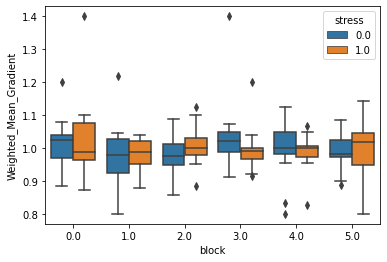

In [ ]:
#here we can plot the WMG for each group in each block
sns.boxplot(data=grouped01, x="block", y="Weighted_Mean_Gradient", hue='stress')

In [ ]:
pg.mixed_anova(data=grouped01, dv='Weighted_Mean_Gradient', subject='participant', within='block', between='stress')

Source        SS  DF1  DF2        MS         F     p-unc  p-GG-corr  \
0       stress  0.000001    1   29  0.000001  0.000131  0.990945        NaN   
1        block  0.028875    5  145  0.005775  1.041044  0.395900   0.380061   
2  Interaction  0.023886    5  145  0.004777  0.861149  0.508924        NaN   

        np2       eps sphericity   W-spher   p-spher  
0  0.000005       NaN        NaN       NaN       NaN  
1  0.034654  0.661969      False  0.338051  0.006723  
2  0.028838       NaN        NaN       NaN       NaN

### FOR WITHIN FACTOR AND BLOCK (ADVANCED ANALYSIS, NOT NECESSARILY NEEDED)

In [ ]:
new_df01.describe()

duration     feedback   noFeedback  Blocks.thisTrialN  \
count  3660.00000  3660.000000  3660.000000        3660.000000   
mean      1.00000     0.491803     0.508197           2.500000   
std       0.33471     0.500001     0.500001           1.708058   
min       0.40000     0.000000     0.000000           0.000000   
25%       0.80000     0.000000     0.000000           1.000000   
50%       1.00000     0.000000     1.000000           2.500000   
75%       1.20000     1.000000     1.000000           4.000000   
max       1.60000     1.000000     1.000000           5.000000   

       Block.thisTrialN    thisRow.t       stress     accuracy  \
count       3660.000000  2940.000000  3660.000000  3660.000000   
mean           4.500000   881.909375     0.508197     0.491803   
std            2.872674   489.360304     0.500001     0.500001   
min            0.000000   134.162586     0.000000     0.000000   
25%            2.000000   501.800691     0.000000     0.000000   
50%            4.500000   831.992258     1.000000     0.000000   
75%            7.000000  1156.342792     1.000000     1.000000   
max            9.000000  2888.305986     1.000000     1.000000   

       polygonBlackSquare.started  polygonBlackSquare.stopped  \
count                 3660.000000                 3435.000000   
mean                   881.497263                  883.192060   
std                    486.463570                  481.795163   
min                    133.079389                  133.479205   
25%                    500.648925                  505.325067   
50%                    824.594573                  830.235921   
75%                   1158.421877                 1164.331134   
max                   2887.007361                 2887.606766   

       key_respBorN.corr  key_respBorN.rt    participant  session          age  
count        3660.000000      3660.000000    3660.000000   3660.0  3660.000000  
mean            0.730601         2.056278  511267.672131      1.0    22.573770  
std             0.443708         9.550355  297657.221711      0.0     1.833093  
min             0.000000       -21.765640   27171.000000      1.0    21.000000  
25%             0.000000         1.415446  231280.000000      1.0    21.000000  
50%             1.000000         1.695342  572697.000000      1.0    22.000000  
75%             1.000000         2.020344  776689.000000      1.0    23.000000  
max             1.000000       525.046891  954504.000000      1.0    30.000000

In [ ]:
#first we need to create new variable indicating in which halve of the experiment each measurement was acquired
new_df01['halve'] = np.where((new_df01['Blocks.thisTrialN'] >= 0) & (new_df01['Blocks.thisTrialN'] <= 2), 1,
                                np.where((new_df01['Blocks.thisTrialN'] >= 3) & (new_df01['Blocks.thisTrialN'] <= 5), 2, np.nan))

# Print the DataFrame to verify the new column
print(new_df01.head())

    duration corrAns  feedback  noFeedback  Blocks.thisTrialN  \
14       1.0       b       1.0         0.0                0.0   
15       0.8       n       1.0         0.0                0.0   
16       1.6       n       1.0         0.0                0.0   
17       0.6       n       1.0         0.0                0.0   
18       1.4       n       1.0         0.0                0.0   

    Block.thisTrialN   thisRow.t  stress  accuracy  \
14               0.0  160.033362     1.0       0.0   
15               1.0  167.613858     1.0       0.0   
16               2.0  175.680219     1.0       0.0   
17               3.0  183.186162     1.0       0.0   
18               4.0  191.197483     1.0       0.0   

    polygonBlackSquare.started  polygonBlackSquare.stopped key_respBorN.keys  \
14                  157.854946                  158.853922                 b   
15                  166.022553                  166.821131                 b   
16                  173.605768              

<ipython-input-99-9ecb5d7741de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df01['halve'] = np.where((new_df01['Blocks.thisTrialN'] >= 0) & (new_df01['Blocks.thisTrialN'] <= 2), 1,


In [ ]:
#create new data frame with response ratios using the dataframe called new_df01 with your data you generated in the section 1

""""
Create a pivot table to calculate the counts of 'b' and 'n' for each group

we need to make the counts for each participant at each duration at each condition,
so edit the code to contain your independent variables
my independent variables were 'feedback' and the halves of the experiment.
keep the variables 'duration' and 'participant' in the list
"""

pivot_table = new_df01.pivot_table(index=['duration', 'participant','feedback', "stress", 'halve'], columns='key_respBorN.keys',
                                   aggfunc='size', fill_value=0)

# Calculate the Response Ratio (count of 'b' / count of 'n') for each group
pivot_table['Response_Ratio'] = pivot_table['b'] / (pivot_table['b'] + pivot_table['n'])

# Reset the index to have a new dataframe with the specified columns
result_df02 = pivot_table.reset_index()

# If you want to replace any NaN values with 0, you can use fillna method
result_df02.fillna(0, inplace=True)

# If you want to save this new dataframe to a CSV file, you can use:
#result_df02.to_csv("response_ratios.csv", index=False)


In [ ]:
result_df02

key_respBorN.keys  duration  participant  feedback  stress  halve   b   n  \
0                       0.4      27171.0       0.0     1.0    1.0   1   2   
1                       0.4      27171.0       0.0     1.0    2.0   0   3   
2                       0.4      27171.0       1.0     1.0    1.0   1   2   
3                       0.4      27171.0       1.0     1.0    2.0   0   3   
4                       0.4      80551.0       0.0     0.0    1.0   1   2   
5                       0.4      80551.0       0.0     0.0    2.0   0   3   
6                       0.4      80551.0       1.0     0.0    1.0   2   1   
7                       0.4      80551.0       1.0     0.0    2.0   2   1   
8                       0.4      96604.0       0.0     1.0    1.0   0   3   
9                       0.4      96604.0       0.0     1.0    2.0   0   3   
10                      0.4      96604.0       1.0     1.0    1.0   0   3   
11                      0.4      96604.0       1.0     1.0    2.0   0   3   
12                      0.4     124367.0       0.0     0.0    1.0   2   1   
13                      0.4     124367.0       0.0     0.0    2.0   0   3   
14                      0.4     124367.0       1.0     0.0    1.0   0   3   
15                      0.4     124367.0       1.0     0.0    2.0   0   3   
16                      0.4     135784.0       0.0     0.0    1.0   0   3   
17                      0.4     135784.0       0.0     0.0    2.0   1   2   
18                      0.4     135784.0       1.0     0.0    1.0   1   2   
19                      0.4     135784.0       1.0     0.0    2.0   1   2   
20                      0.4     144507.0       0.0     0.0    1.0   0   3   
21                      0.4     144507.0       0.0     0.0    2.0   0   3   
22                      0.4     144507.0       1.0     0.0    1.0   0   3   
23                      0.4     144507.0       1.0     0.0    2.0   0   3   
24                      0.4     195972.0       0.0     0.0    1.0   0   3   
25                      0.4     195972.0       0.0     0.0    2.0   1   2   
26                      0.4     195972.0       1.0     0.0    1.0   0   3   
27                      0.4     195972.0       1.0     0.0    2.0   1   2   
28                      0.4     201266.0       0.0     1.0    1.0   0   3   
29                      0.4     201266.0       0.0     1.0    2.0   0   3   
30                      0.4     231280.0       0.0     0.0    1.0   0   3   
31                      0.4     231280.0       0.0     0.0    2.0   0   3   
32                      0.4     231280.0       1.0     0.0    1.0   2   1   
33                      0.4     231280.0       1.0     0.0    2.0   0   3   
34                      0.4     247059.0       0.0     1.0    1.0   0   3   
35                      0.4     247059.0       0.0     1.0    2.0   0   3   
36                      0.4     247059.0       1.0     1.0    1.0   0   3   
37                      0.4     247059.0       1.0     1.0    2.0   0   3   
38                      0.4     341031.0       0.0     0.0    1.0   0   3   
39                      0.4     341031.0       0.0     0.0    2.0   0   3   
40                      0.4     341031.0       1.0     0.0    1.0   0   3   
41                      0.4     341031.0       1.0     0.0    2.0   0   3   
42                      0.4     344553.0       0.0     1.0    1.0   0   3   
43                      0.4     344553.0       0.0     1.0    2.0   0   3   
44                      0.4     344553.0       1.0     1.0    1.0   0   3   
45                      0.4     344553.0       1.0     1.0    2.0   0   3   
46                      0.4     379479.0       0.0     1.0    1.0   0   3   
47                      0.4     379479.0       0.0     1.0    2.0   0   3   
48                      0.4     379479.0       1.0     1.0    1.0   0   3   
49                      0.4     379479.0       1.0     1.0    2.0   0   3   
50                      0.4     427694.0       0.0     1.0    1.0   0   3

In [ ]:
# Assuming you have the 'result_df02' dataframe from the previous step

"""
We are replicating a procedure from Klapproth and Wearden, 2011
Here is citation from the paper, describing the construction of the parameter:

In order to numerically examine the shift of the
gradients, we calculated the weighted mean of the
gradient of each participant.
This was done by
[1]multiplying the number of “same” responses with the
duration at which a “same” response was given,
[2] adding these products,
and then
[4] dividing this weighted sum by the number of “same” responses
of each participant given at all durations (calculated at step [3] in our case)
"""


# [1] Calculate the weighted sum for each participant and duration combination (result_df02 already contains number of same responses as variable 'b')

result_df02['Weighted_Sum'] = result_df02['b'] * result_df02['duration']

# [2] Add the weighted sums to have a total for each combination of participant and values of your independent variables
""""
You will need to replace my independent variables by yours.
Keep the participant in the list, though.
"""
grouped02 = result_df02.groupby(['participant','stress','halve', 'feedback'])['Weighted_Sum'].sum().reset_index()

# [3] Calculate the total count of "b" responses for each participant and feedback combination
grouped02['Total_b_Responses'] = result_df02.groupby(['participant', 'feedback', 'halve'])['b'].transform('sum')

# [4] Calculate the weighted mean of the gradient for each participant and feedback combination
grouped02['Weighted_Mean_Gradient'] = grouped02['Weighted_Sum'] / grouped02['Total_b_Responses']

# If you want to save this new dataframe to a CSV file, you can use:
#grouped02.to_csv("weighted_mean_gradient.csv", index=False)



In [ ]:
#in this version of final data frame for analysis, I have 2 measurements per participant
grouped02

participant  stress  halve  feedback  Weighted_Sum  Total_b_Responses  \
0        27171.0     1.0    1.0       0.0          11.8                 11   
1        27171.0     1.0    1.0       1.0          13.0                 10   
2        27171.0     1.0    2.0       0.0          10.6                 14   
3        27171.0     1.0    2.0       1.0          14.6                 14   
4        80551.0     0.0    1.0       0.0          10.0                 10   
5        80551.0     0.0    1.0       1.0           9.8                  5   
6        80551.0     0.0    2.0       0.0           5.4                 11   
7        80551.0     0.0    2.0       1.0          14.6                 15   
8        96604.0     1.0    1.0       0.0           8.6                  8   
9        96604.0     1.0    1.0       1.0          11.4                 18   
10       96604.0     1.0    2.0       0.0          18.6                 12   
11       96604.0     1.0    2.0       1.0          12.2                 12   
12      124367.0     0.0    1.0       0.0          14.4                 16   
13      124367.0     0.0    1.0       1.0           8.0                 13   
14      124367.0     0.0    2.0       0.0          14.0                  8   
15      124367.0     0.0    2.0       1.0          11.0                 11   
16      135784.0     0.0    1.0       0.0          11.2                 11   
17      135784.0     0.0    1.0       1.0          13.0                 20   
18      135784.0     0.0    2.0       0.0          18.6                 14   
19      135784.0     0.0    2.0       1.0          17.0                 17   
20      144507.0     0.0    1.0       0.0          15.4                 15   
21      144507.0     0.0    1.0       1.0           9.8                 15   
22      144507.0     0.0    2.0       0.0          14.8                 10   
23      144507.0     0.0    2.0       1.0          12.2                 13   
24      195972.0     0.0    1.0       0.0          15.2                 16   
25      195972.0     0.0    1.0       1.0          12.2                 10   
26      195972.0     0.0    2.0       0.0           9.4                 12   
27      195972.0     0.0    2.0       1.0          12.0                 13   
28      201266.0     1.0    1.0       0.0          13.8                 13   
29      201266.0     1.0    2.0       0.0          16.2                 15   
30      231280.0     0.0    1.0       0.0          11.6                 12   
31      231280.0     0.0    1.0       1.0           9.4                  7   
32      231280.0     0.0    2.0       0.0           6.8                 11   
33      231280.0     0.0    2.0       1.0          13.2                 13   
34      247059.0     1.0    1.0       0.0          11.4                 11   
35      247059.0     1.0    1.0       1.0          12.2                  9   
36      247059.0     1.0    2.0       0.0           9.2                 12   
37      247059.0     1.0    2.0       1.0          11.4                 11   
38      341031.0     0.0    1.0       0.0          11.8                 12   
39      341031.0     0.0    1.0       1.0          15.0                 16   
40      341031.0     0.0    2.0       0.0          17.8                 15   
41      341031.0     0.0    2.0       1.0          12.6                 13   
42      344553.0     1.0    1.0       0.0          16.0                 16   
43      344553.0     1.0    1.0       1.0          15.2                 16   
44      344553.0     1.0    2.0       0.0          16.8                 15   
45      344553.0     1.0    2.0       1.0          16.6                 17   
46      379479.0     1.0    1.0       0.0          19.6                 18   
47      379479.0     1.0    1.0       1.0          14.6                 16   
48      379479.0     1.0    2.0       0.0          16.8                 15   
49      379479.0     1.0    2.0       1.0          13.2                 13   
50      427694.0     1.0   

<AxesSubplot:xlabel='halve', ylabel='Weighted_Mean_Gradient'>

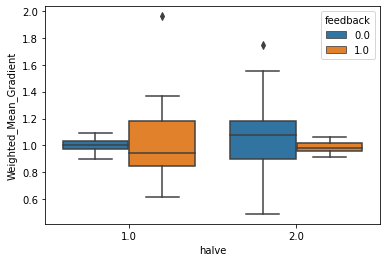

In [ ]:
#here we can plot the WMG for each group in each block
sns.boxplot(data=grouped02, x="halve", y="Weighted_Mean_Gradient", hue='feedback')

In [ ]:
# SKIP THIS TOO, UNLESS YOU WANT TO REMOVE A PARTICIPANT FROM THE RESULT_DF

# we create a subset of the data, excluding participant with incomplete experiment (SKIP THIS AT FIRST)
grouped02 = grouped02[grouped02['participant'] != 201266]

In [ ]:
pg.rm_anova(data=grouped02, within=['halve', 'feedback'], dv='Weighted_Mean_Gradient', subject='participant')

Source        SS  ddof1  ddof2        MS          F     p-unc  \
0             halve  0.017686      1     29  0.017686   0.242395  0.626188   
1          feedback  0.044304      1     29  0.044304   0.583330  0.451179   
2  halve * feedback  0.046094      1     29  0.046094  10.005377  0.003646   

   p-GG-corr       np2  eps  
0   0.626188  0.008289  1.0  
1   0.451179  0.019718  1.0  
2   0.003646  0.256513  1.0

T  dof       tail     p-val         CI95%   cohen-d   BF10  \
T-test -0.014613   58  two-sided  0.988391  [-0.11, 0.1]  0.003773  0.262   

           power  
T-test  0.050024

WMG under no-feedback condition: 0.9988255589726179
WMG under feedback condition: 0.9995942303883478
mean difference: -0.0007686714157298935


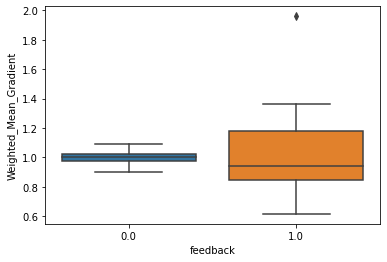

In [ ]:
#ttest for within factor
data = grouped02[grouped02['halve'] == 1]

x = data[(data["feedback"]==0)]["Weighted_Mean_Gradient"]
y = data[(data["feedback"]==1)]["Weighted_Mean_Gradient"]
display(pg.ttest(x,y, paired=False))
sns.boxplot(data=data, x="feedback", y="Weighted_Mean_Gradient")
print("WMG under no-feedback condition:", x.mean())
print("WMG under feedback condition:", y.mean())
mean_diff = x.mean() - y.mean()
print("mean difference:", mean_diff)

T  dof       tail    p-val          CI95%   cohen-d   BF10  \
T-test  1.530334   58  two-sided  0.13137  [-0.02, 0.18]  0.395131  0.697   

           power  
T-test  0.324841

WMG under no-feedback condition: 1.0623034759358287
WMG under feedback condition: 0.984676364485188
mean difference: 0.07762711145064072


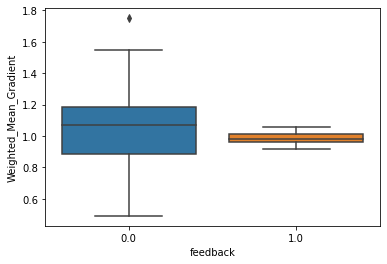

In [ ]:
#ttest for within factor
data = grouped02[grouped02['halve'] == 2]

x = data[(data["feedback"]==0)]["Weighted_Mean_Gradient"]
y = data[(data["feedback"]==1)]["Weighted_Mean_Gradient"]
display(pg.ttest(x,y, paired=False))
sns.boxplot(data=data, x="feedback", y="Weighted_Mean_Gradient")
print("WMG under no-feedback condition:", x.mean())
print("WMG under feedback condition:", y.mean())
mean_diff = x.mean() - y.mean()
print("mean difference:", mean_diff)

In [ ]:
pg.pairwise_ttests(data=grouped02, within=['halve', 'feedback'], dv='Weighted_Mean_Gradient', subject='participant', effsize='cohen')

Contrast halve  A  B Paired  Parametric         T   dof       Tail  \
0             halve     -  1  2   True        True -0.492337  29.0  two-sided   
1          feedback     -  0  1   True        True  0.763761  29.0  two-sided   
2  halve * feedback     1  0  1   True        True -0.014884  29.0  two-sided   
3  halve * feedback     2  0  1   True        True  1.492990  29.0  two-sided   

      p-unc   BF10     cohen  
0  0.626188  0.217 -0.172075  
1  0.451179  0.254  0.267380  
2  0.988227  0.194 -0.003773  
3  0.146241  0.527  0.395131

<AxesSubplot:xlabel='halve', ylabel='Weighted_Mean_Gradient'>

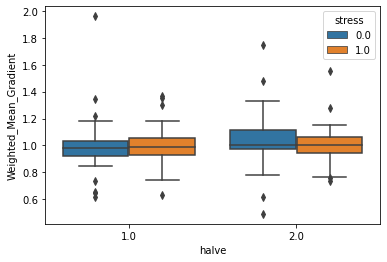

In [ ]:
#here we can plot the WMG for each group in each block
sns.boxplot(data=grouped02, x="halve", y="Weighted_Mean_Gradient", hue='stress')